<a href="https://colab.research.google.com/github/hoperw/Predicting-GoodReads-Ratings-ML-Project/blob/main/Capstone_Project_iphttps_colab_research_google_com_drive_1zjdNOu_4kcMHANxZ4nC4_jF5aeNhPgiY_scrollTo%3Db1MAJLprIe_Jynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.set_option('display.max_rows', None)

<h1>Predicting GoodReads Rating Scores for Science Ficton Books</h1>

**Features:**

Hot one encoded classication data for the subgenres:

classic, hugo, science fiction, horror, action, children, young adult, space, romance, post apocalyptic, hard, short stories, military cyberpunk

Numeric:

rating votes, review number

**Label:**  rating score


<h1>Uploading Data</h1>

Loading all of the different subgenre datasets, concatonating them together.  Many of the individual datasets include
duplicate books and their genres are stored in strings that appear to be like python dictionaries or JSON objects.
The data was prepared to remove duplicates and find a way to make the subgenre data useful, into their own hot one encoded
columns.

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_aliens.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_alternate_history.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_alternate_universe.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_apocalyptic.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_cyberpunk.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_dystopia.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_hard.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_military.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_robots.csv')
df10 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_space_opera.csv')
df11 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_steampunk.csv')
df12 = pd.read_csv('https://raw.githubusercontent.com/hoperw/Predicting-GoodReads-Ratings-ML-Project/main/GoodReads_Data/sf_time_travel.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14974 entries, 0 to 1247
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Book_Title           14974 non-null  object 
 1   Original_Book_Title  14974 non-null  object 
 2   Author_Name          14974 non-null  object 
 3   Edition_Language     14942 non-null  object 
 4   Rating_score         14974 non-null  float64
 5   Rating_votes         14974 non-null  int64  
 6   Review_number        14974 non-null  int64  
 7   Book_Description     14903 non-null  object 
 8   Year_published       14974 non-null  int64  
 9   Genres               14974 non-null  object 
 10  url                  14974 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


In [ ]:
df.head()
df['Genres']

0       {'Young Adult': 3439, 'Fantasy (Paranormal) ':...
1       {'Young Adult': 2271, 'Fantasy (Paranormal) ':...
2       {'Young Adult': 5436, 'Science Fiction': 3327,...
3       {'Young Adult': 4529, 'Science Fiction': 4285,...
4       {'Young Adult': 1855, 'Fantasy (Paranormal) ':...
5       {'Young Adult': 1467, 'Fantasy (Paranormal) ':...
6       {'Young Adult': 1186, 'Fantasy (Paranormal) ':...
7       {'Young Adult': 3598, 'Fantasy': 2417, 'Scienc...
8       {'Young Adult': 2197, 'Science Fiction': 1469,...
9       {'Young Adult': 766, 'Fantasy (Paranormal) ': ...
10      {'Young Adult': 804, 'Science Fiction': 635, '...
11      {'Science Fiction': 15715, 'Fiction': 7798, 'Y...
12      {'Fantasy (Paranormal) ': 556, 'Romance': 531,...
13      {'Romance': 621, 'Science Fiction': 436, 'Scie...
14      {'Young Adult': 1578, 'Fantasy': 1200, 'Scienc...
15      {'Science Fiction': 14431, 'Fiction': 10469, '...
16      {'Romance': 451, 'Science Fiction': 390, 'Scie...
17      {'Youn

<h2>Dropping categorical features that won't be used in model</h2>




In [ ]:
# genres will later be dropped after the keys are used

df = df.rename(columns = str.lower)

df['book_title'] = df['book_title'].str.lower()
df['author_name'] = df['author_name'].str.lower()
df['genres'] = df['genres'].str.lower()  

df = df.drop(['original_book_title', 'edition_language', 'book_description', 'url', 'year_published'], axis=1)


In [ ]:
# remove entries without genres

df.reset_index(drop=True, inplace=True)
nullVal = "{'none': 1000}"

df = df[df.genres != nullVal]
df = df[df.rating_score != 0]

count = 0

for i in range(len(df)):
  if df.iloc[i]['genres'] == nullVal:
      count += 1
      df.reset_index(drop=True, inplace=True)

count

0

<h2>Adding columns that will later be used as hot one encoding for subgenres</h2>


In [ ]:
subgenres = ['classic', 'fantasy', 'hugo', 'science fiction', 'horror', 'action',
            'children', 'young adult', 'space', 'romance', 'dystopian', 'post apocalyptic', 
            'hard', 'short stories', 'military', 'cyberpunk']

# below columns will serve as hot one encoded features for when the genres are later separated out of the string currently 
# stored in

df = df.assign(classic = 0)
df = df.assign(hugo = 0)
df = df.assign(science_fiction = 0)
df = df.assign(horror = 0)
df = df.assign(action = 0)
df = df.assign(children = 0)
df = df.assign(young_adult = 0)
df = df.assign(space = 0)
df = df.assign(romance = 0)
df = df.assign(dystopian = 0)
df = df.assign(post_apocalyptic = 0)
df = df.assign(hard = 0)
df = df.assign(short_stories = 0)
df = df.assign(military = 0)
df = df.assign(cyberpunk = 0)



<h2>Removing Duplicates from concatenating the datasets</h2>


In [ ]:
def countDuplicates(data_frame):
  bool_series = data_frame.duplicated()
  count = 0
  duplicate_rows = []
  for index, value in bool_series.items():
    if value:
        count += 1
        duplicate_rows.append(index)
  print(f"Duplicates: {count}")
        
countDuplicates(df)



Duplicates: 2374


In [ ]:
# drop the duplicates found

df.drop_duplicates(inplace=True)

# reset the indices after dropping the duplicates

df.reset_index(drop=True, inplace=True)

<h2>Making the genre keys accesible by converting them to JSON, updating subgenre columns to 1 if subgenre exists, 0 if not</h2>

In [ ]:
# acts as hot one encoding, updates feature column to true if that subgenre exists for 
# that entry after converting the entry into JSON
# prepare to convert to JSON

def updateFeatures(data_frame, column):
    for i in range(len(data_frame)):
        try:
          jsonStr = data_frame.iloc[i][column].replace("'", '"')
          json_obj = json.loads(jsonStr)
        
          df.at[i, 'classic'] = getSubgenres(json_obj, 'classic')
          df.at[i, 'hugo'] = getSubgenres(json_obj, 'hugo')
          df.at[i, 'science_fiction'] = getSubgenres(json_obj, 'science fiction')
          df.at[i, 'horror'] = getSubgenres(json_obj, 'horror')
          df.at[i, 'action'] = getSubgenres(json_obj, 'action')
          df.at[i, 'children'] = getSubgenres(json_obj, 'children')
          df.at[i, 'young_adult'] = getSubgenres(json_obj, 'young adult')
          df.at[i, 'space'] = getSubgenres(json_obj, 'space')
          df.at[i, 'romance'] = getSubgenres(json_obj, 'romance')
          df.at[i, 'dystopian'] = getSubgenres(json_obj, 'dystopian')
          df.at[i, 'post_apocalyptic'] = getSubgenres(json_obj, 'post apocalyptic')
          df.at[i, 'hard'] = getSubgenres(json_obj, 'hard')
          df.at[i, 'short_stories'] = getSubgenres(json_obj, 'short stories')
          df.at[i, 'military'] = getSubgenres(json_obj, 'military')
          df.at[i, 'cyberpunk'] = getSubgenres(json_obj, 'cyberpunk')
        except:
          print(data_frame.iloc[i][column])

    
def getSubgenres(json_object, subgenre):
    hasSubgenre = 0
    for i in json_object:
        if subgenre in i:
            hasSubgenre = 1
    return hasSubgenre
    

In [ ]:
updateFeatures(df, "genres")

<h2>Checking for null values</h2>

In [ ]:
df.reset_index(drop=True, inplace=True)

df.isnull().sum()
df.isna().sum()

book_title          0
author_name         0
rating_score        0
rating_votes        0
review_number       0
genres              0
classic             0
hugo                0
science_fiction     0
horror              0
action              0
children            0
young_adult         0
space               0
romance             0
dystopian           0
post_apocalyptic    0
hard                0
short_stories       0
military            0
cyberpunk           0
dtype: int64

In [ ]:
# drop genre categorical column, it's no longer needed 

df = df.drop(['genres'], axis=1)

<h2>Checking for and removing duplicates</h2>

In [ ]:
countDuplicates(df)


Duplicates: 63


In [ ]:
df.drop_duplicates(inplace=True)

data = df[['author_name','book_title','rating_score', 'rating_votes', 'review_number', 'classic', 'hugo', 'science_fiction', 
            'horror', 'action', 'children', 'young_adult', 'space', 'romance', 'post_apocalyptic',
            'hard', 'short_stories', 'military', 'cyberpunk']]

<h2>Viewing Spread of Data, Checking for Outliers</h2>

In [ ]:
data[['rating_score', 'rating_votes', 'review_number']].describe()

,rating_score,rating_votes,review_number
count,12470.000000,1.247000e+04,12470.000000
mean,3.934281,3.627533e+04,1949.134884
std,0.286229,2.066101e+05,6894.363827
min,2.500000,2.000000e+00,0.000000
25%,3.750000,7.840000e+02,64.000000
50%,3.950000,2.604000e+03,210.000000
75%,4.140000,1.154850e+04,939.000000
max,5.000000,7.336299e+06,174090.000000


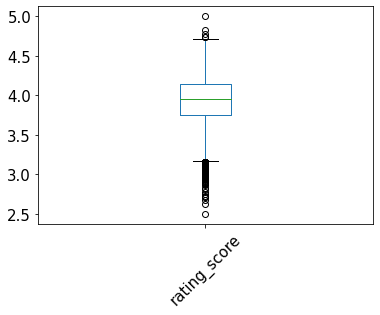

In [ ]:
data.boxplot(column=['rating_score'], grid=False, rot=45, fontsize=15)

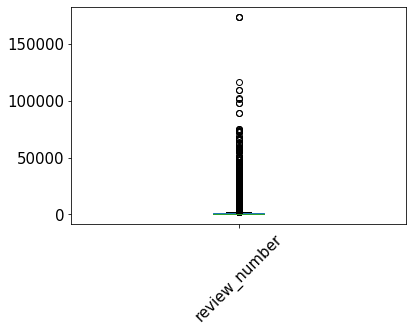

In [ ]:
data.boxplot(column=['review_number'], grid=False, rot=45, fontsize=15)

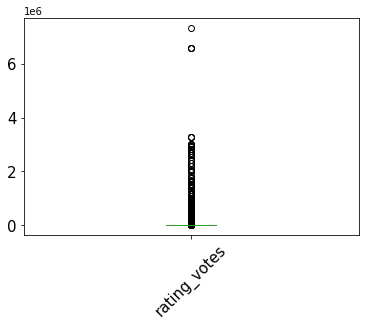

In [ ]:
data.boxplot(column=['rating_votes'], grid=False, rot=45, fontsize=15)

<h2>Determining Outliers</h2>

In [ ]:
def getQuartile(colStr, data_frame, range):
    quartile = 0
    if range == 1:
      quartile = data_frame[colStr].quantile(0.25)
    elif range == 3:
      quartile = data_frame[colStr].quantile(0.75)
    return quartile

def getIQR(q3, q1):
  return q3 - q1

def countOutliers(colStr, data_frame):
    Q1 = getQuartile(colStr, data_frame, 1)
    Q3 = getQuartile(colStr, data_frame, 3)
    IQR = getIQR(Q3, Q1)
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    count = 0
    for i in range(len(data_frame)):
      if data_frame.iloc[i][colStr] < Lower_Fence or data_frame.iloc[i][colStr] > Upper_Fence:
        count += 1
    return count

def removeOutliers(colStrs, data_frame):
    for str in colStrs:
      Q1 = getQuartile(str, data_frame, 1)
      Q3 = getQuartile(str, data_frame, 3)
      IQR = getIQR(Q3, Q1)
      Lower_Fence = Q1 - (1.5 * IQR)
      Upper_Fence = Q3 + (1.5 * IQR)
      data_frame = data_frame[data_frame[str] >= Lower_Fence]
      data_frame = data_frame[data_frame[str] <= Upper_Fence]
    return data_frame

df = removeOutliers(['rating_score', 'rating_votes', 'review_number'], df)

print(f"There are {countOutliers('rating_score', df)} outliers for the rating scores\n")
print(f"There are {countOutliers('rating_votes', df)} outliers for the rating votes\n")
print(f"There are {countOutliers('review_number', df)} outliers for the review number\n")



There are 1 outliers for the rating scores

There are 820 outliers for the rating votes

There are 641 outliers for the review number



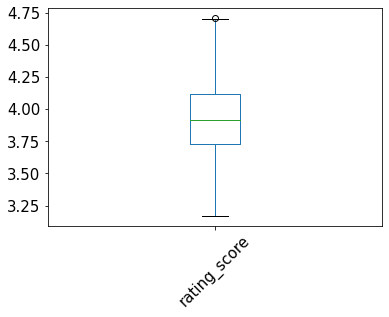

In [ ]:
df.boxplot(column=['rating_score'], grid=False, rot=45, fontsize=15)

<h2>Visualizing the Data</h2>

There seems to be a little of a correlation where as the number of reviews increases, the rating score increases.  This makes intuitive sense as a more popular book gets more reviews and is likely to be more highly rated.  It looks similar but less dramatic with the number of ratings and the rating score.

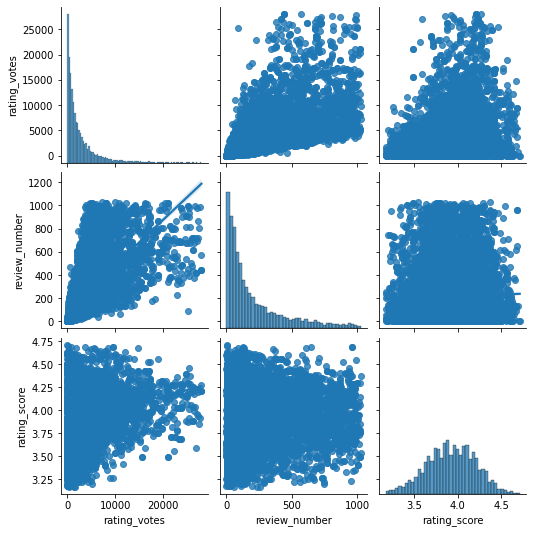

In [ ]:
quantitativeData = df[['rating_votes', 'review_number', 'rating_score']]

sns.pairplot(quantitativeData, kind = 'reg')

<h2>Functions used for other Visualizations</h2>

In [ ]:

subgenres = ['classic', 'hugo', 'science_fiction', 
            'horror', 'action', 'children', 'young_adult', 'space', 'romance', 'post_apocalyptic',
            'hard', 'short_stories', 'military', 'cyberpunk']

def getTotalofSubgenre(data_frame, subgenre):
  count = 0
  for i in data_frame[subgenre]:
    if i == 1:
      count += 1
  return count

def avgRatingBySubgenre(data_frame, subgenre):
  ratings = []
  for i in range(len(data_frame[subgenre])):
    if data_frame.iloc[i][subgenre] == 1:
      ratings.append(data_frame.iloc[i]['rating_score'])
  return sum(ratings)/len(ratings)

def printRatingsBySubgenre(data_frame, subgenres):
  ratings = []
  for i in subgenres:
    rating = avgRatingBySubgenre(data_frame, i)
    print(f'Rating for {i}: {rating}')
    ratings.append(rating)
  return ratings

def getSubgenreRatio(data_frame, subgenreTotal):
  return subgenreTotal / len(df)

def getRatios(data_frame, subgenres):
  ratios = []
  for i in range(len(subgenres)):
    subgenre = subgenres[i]
    subgenreTotal = getTotalofSubgenre(data_frame, subgenre)
    ratio = getSubgenreRatio(data_frame, subgenreTotal)
    ratios.append(ratio)
  return ratios

def printPercents(ratios, subgenres):
  print(f'Ratios are: \n')
  for i in range(len(ratios)):
    print(f'{subgenres[i]}: {ratios[i] * 100}%\n')

def categorizeRating(data_frame):
  for i in range(len(data_frame)):
    data_frame.at[i,'rating_score'] = round(data_frame.iloc[i]['rating_score'])



In [ ]:
#printPercents(getRatios(data, subgenres), subgenres)
ratings = printRatingsBySubgenre(data, subgenres)

Rating for classic: 3.973464163822527
Rating for hugo: 3.974838709677418
Rating for science_fiction: 3.92533103745157
Rating for horror: 3.932509534706332
Rating for action: 4.038259773013871
Rating for children: 3.9326309662398153
Rating for young_adult: 3.9386821942997234
Rating for space: 4.001191827468794
Rating for romance: 3.9591897918731465
Rating for post_apocalyptic: 3.9065222551928778
Rating for hard: 3.923267973856209
Rating for short_stories: 3.9100431034482765
Rating for military: 4.042236166571588
Rating for cyberpunk: 3.8662327416173543


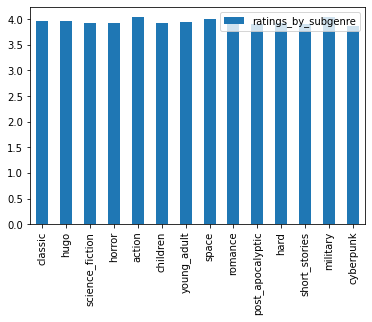

In [ ]:
ratingsdf = pd.DataFrame(ratings, columns = ['ratings_by_subgenre'], index=subgenres)
ratingsdf.plot.bar()

In [ ]:
ratingsdf.describe()

,ratings_by_subgenre
count,14.000000
mean,3.951743
std,0.050146
min,3.866233
25%,3.923784
50%,3.935657
75%,3.974495
max,4.042236


<h2>Functions Used in Models</h2>

In [ ]:



def display_cross_validation_results(model, X_train, y_train, folds):
    results = cross_val_score(model, X_train, y_train, cv=folds, scoring='r2')
    print(f"Cross validation results with {folds} folds: {results}")
    return results

# returns r2 scores for cases from 1 to 20 neighbors

def tryDifferentNumNeighbors(num, features, label):
  trainingScores = []
  testingScores = []
  crossValScores = []
  for i in range(1, num):

    knn = KNeighborsRegressor(n_neighbors = i)
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)
    knn.fit(X_train, y_train)
    trainingScores.append([i, knn.score(X_train, y_train)])
    testingScores.append([i, knn.score(X_test, y_test)])
    crossValScores.append([i, display_cross_validation_results(knn, X_train, y_train, 5)])
    
  return [trainingScores, testingScores, crossValScores]

<h2>Data Standardization</h2>

In [ ]:
scaler = MinMaxScaler()

# features including categories

featuresWithCategories = df[['rating_votes', 'review_number', 'classic', 'hugo', 'science_fiction', 
            'horror', 'action', 'children', 'young_adult', 'space', 'romance', 'post_apocalyptic',
            'hard', 'short_stories', 'military', 'cyberpunk']]

# features without including categories

featuresNoCategories = df[['rating_votes', 'review_number']]

label = df['rating_score']

scaledFeaturesWithCategories = scaler.fit_transform(featuresWithCategories)
scaledFeaturesNoCategories = scaler.fit_transform(featuresNoCategories)

featuresWithCategories = pd.DataFrame(scaledFeaturesWithCategories, columns = ['rating_votes', 'review_number', 'classic', 'hugo', 'science_fiction', 
            'horror', 'action', 'children', 'young_adult', 'space', 'romance', 'post_apocalyptic',
            'hard', 'short_stories', 'military', 'cyberpunk'])

featuresNoCategories = pd.DataFrame(scaledFeaturesNoCategories, columns = ['rating_votes', 'review_number'])


featuresNoCategories.head(5)



,rating_votes,review_number
0,0.443981,0.556098
1,0.340855,0.749268
2,0.294514,0.684878
3,0.410437,0.562927
4,0.279328,0.612683


In [ ]:
featuresNoCategories.describe()

,rating_votes,review_number
count,9348.000000,9348.000000
mean,0.107492,0.208127
std,0.146991,0.227758
min,0.000000,0.000000
25%,0.019775,0.044878
50%,0.053399,0.114146
75%,0.130503,0.291707
max,1.000000,1.000000


<h2>Splitting data for the features including subgenres</h2>


In [ ]:
X = featuresWithCategories.copy()
y = label.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
display_cross_validation_results(dummy, X_train, y_train, 5)
print(f"Training set accuracy: {dummy.score(X_train, y_train)}, Test set accuracy: {dummy.score(X_test, y_test)}")

Cross validation results with 5 folds: [-1.03476522e-04 -2.22194809e-07 -1.34634074e-03 -3.06605276e-03
 -7.00321320e-04]
Training set accuracy: 0.0, Test set accuracy: -0.0008192800737019112


<h2>Running KNN Regressor from 1 to 20 neighbors for dataset including subgenres</h2>



In [ ]:
resultsWithCategories = tryDifferentNumNeighbors(20, X, y)

Cross validation results with 5 folds: [-0.4440482  -0.44243146 -0.42228502 -0.55732063 -0.44860424]
Cross validation results with 5 folds: [-0.12891654 -0.07123887 -0.05682448 -0.12313274 -0.09870189]
Cross validation results with 5 folds: [-0.01727992  0.01950583  0.02331364  0.01488849 -0.03486477]
Cross validation results with 5 folds: [0.00031936 0.07584219 0.10756332 0.06190554 0.00433832]
Cross validation results with 5 folds: [0.05345396 0.05578601 0.06619081 0.11753621 0.07948807]
Cross validation results with 5 folds: [0.11604552 0.07672613 0.12396609 0.14998206 0.09851502]
Cross validation results with 5 folds: [0.08918438 0.125231   0.1340669  0.12466555 0.16409433]
Cross validation results with 5 folds: [0.15772622 0.15058905 0.14269301 0.12566907 0.11322124]
Cross validation results with 5 folds: [0.18049325 0.14109063 0.16730751 0.13877704 0.07953149]
Cross validation results with 5 folds: [0.12927385 0.1405709  0.14540049 0.13325018 0.1501101 ]
Cross validation results 

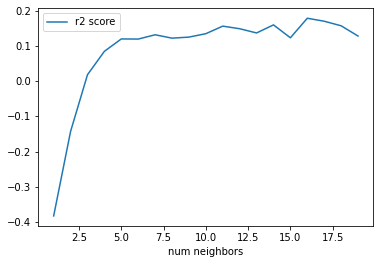

In [ ]:
resultsWithCategoriesTrainingSet = resultsWithCategories[0]
resultsWithCategoriesTestSet = resultsWithCategories[1]
resultsCrossVal = resultsWithCategories[2]
resultsWithCategoriesTestSet = pd.DataFrame(resultsWithCategories[1], columns = ['num neighbors', 'r2 score'])
resultsWithCategoriesTestSet.plot.line(x='num neighbors', y='r2 score')

In [ ]:
resultsCrossVal

[[1, array([-0.4440482 , -0.44243146, -0.42228502, -0.55732063, -0.44860424])],
 [2, array([-0.12891654, -0.07123887, -0.05682448, -0.12313274, -0.09870189])],
 [3, array([-0.01727992,  0.01950583,  0.02331364,  0.01488849, -0.03486477])],
 [4, array([0.00031936, 0.07584219, 0.10756332, 0.06190554, 0.00433832])],
 [5, array([0.05345396, 0.05578601, 0.06619081, 0.11753621, 0.07948807])],
 [6, array([0.11604552, 0.07672613, 0.12396609, 0.14998206, 0.09851502])],
 [7, array([0.08918438, 0.125231  , 0.1340669 , 0.12466555, 0.16409433])],
 [8, array([0.15772622, 0.15058905, 0.14269301, 0.12566907, 0.11322124])],
 [9, array([0.18049325, 0.14109063, 0.16730751, 0.13877704, 0.07953149])],
 [10, array([0.12927385, 0.1405709 , 0.14540049, 0.13325018, 0.1501101 ])],
 [11, array([0.17727649, 0.12810668, 0.14752754, 0.10264756, 0.09534432])],
 [12, array([0.17029568, 0.12795487, 0.15353681, 0.11106923, 0.12948125])],
 [13, array([0.105353  , 0.14343534, 0.1292868 , 0.17172077, 0.15617744])],
 [14, 

<h2>Running KNN Regressor from 1 to 20 neighbors for dataset NOT including subgenres</h2>





Cross validation results with 5 folds: [-0.63843679 -0.69330482 -0.57761582 -0.53495552 -0.63659732]
Cross validation results with 5 folds: [-0.25185998 -0.26169151 -0.22686528 -0.25458581 -0.28624933]
Cross validation results with 5 folds: [-0.07472799 -0.17810645 -0.14673818 -0.1165603  -0.18387003]
Cross validation results with 5 folds: [-0.03565074 -0.02189699  0.03588927 -0.06934526 -0.06254346]
Cross validation results with 5 folds: [-0.03421424  0.01138094 -0.00119495 -0.04677406 -0.03372159]
Cross validation results with 5 folds: [ 0.03804457  0.00208576  0.0216803  -0.00187403  0.00614143]
Cross validation results with 5 folds: [-0.02019191  0.04432832  0.02250982 -0.00447724  0.01521141]
Cross validation results with 5 folds: [0.03728078 0.05869856 0.05211308 0.04576763 0.00986937]
Cross validation results with 5 folds: [0.0851969  0.09275028 0.07097178 0.055877   0.03586923]
Cross validation results with 5 folds: [0.08213242 0.06750496 0.08429472 0.04778908 0.05331419]
Cross

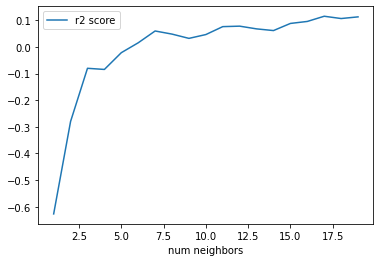

In [ ]:
X = featuresNoCategories.copy()
y = label.copy()

resultsNoCategories = tryDifferentNumNeighbors(20, X, y)
resultsNoCategoriesTestSet = resultsNoCategories[0]
resultsNoCategoriesTrainingSet = pd.DataFrame(resultsNoCategories[1], columns = ['num neighbors', 'r2 score'])
resultsNoCategoriesTrainingSet.plot.line(x='num neighbors', y='r2 score')

<h2>Model with Author Mean Ratings</h2>

To see how the model could work with the authors' mean rating score as a feature the rating for each author needs to be filtered out, the mean calculated, and then an additional column with that mean feature needs to be included in the data frame.

Using a copy of the data frame from earlier prior to standardizing the data we can get this information, restandardize the data and see how well the model performs.

In [ ]:
data.head()

,author_name,book_title,rating_score,rating_votes,review_number,classic,hugo,science_fiction,horror,action,children,young_adult,space,romance,post_apocalyptic,hard,short_stories,military,cyberpunk
0,jennifer l. armentrout,obsidian,4.17,236780,18161,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,jennifer l. armentrout,onyx,4.27,153429,10497,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,rick yancey,the 5th wave,4.03,400600,29990,0,0,1,0,0,0,1,0,1,1,0,0,0,0
3,stephenie meyer,the host,3.84,915026,41673,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,jennifer l. armentrout,opal,4.27,129006,9463,0,0,1,0,0,0,1,0,1,0,0,0,0,0


<h2>Get Unique List of Author Names</h2>

Duplicates are dropped and unique names are stored in a dataframe to be used later

In [ ]:
authordf = data[['author_name']]
authorRatingsdf = data[['author_name','rating_score']]
authorRatingsdf.info()

data = data.assign(author_mean_rating = 0.0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12470 entries, 0 to 12532
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author_name   12470 non-null  object 
 1   rating_score  12470 non-null  float64
dtypes: float64(1), object(1)
memory usage: 292.3+ KB


In [ ]:
data.head()
data.duplicated().sum()

0

<h2>Updating the data frame to include the means calculated using the unique author list</h2>

In [ ]:
authorList = authordf.values.tolist()
authorList = [item for sublist in authorList for item in sublist]
data.reset_index(drop=True, inplace=True)



def setRatingsIndf(df_to_update, author_rating_df, author_list):
  for i in range(len(author_list)):
    author = authorList[i]
    authordf = author_rating_df[author_rating_df['author_name'] == author]
    meanRating = author_rating_df[author_rating_df['author_name'] == author_list[i]]['rating_score'].mean()
    print(meanRating)
    df_to_update.at[i, 'author_mean_rating'] = meanRating
  return df_to_update

data = setRatingsIndf(data, authorRatingsdf, authorList)



Streaming output truncated to the last 5000 lines.
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.658
3.8554999999999993
3.8554999999999993
3.8554999999999993
3.9099999999999997
3.9099999999999997
3.9099999999999997
3.869347826086956
3.869347826086956
3.869347826086956
3.869347826086956
3.869347826086956
3.869347826086956
4.006666666666667
3.869347826086956
3.869347826086956
3.869347826086956
4.006666666666667
4.006666666666667
3.66
4.006666666666667
4.1874242424242425
3.658
3.8874999999999997
3.84
3.61
4.0627272727272725
3.33
3.81
3.5383333333333327
3.733333333333333
4.109999999999999
4.109999999999999
3.7606666666666664
3.841111111111111
3.841111111111111
3.864
3.864
3.864
3.864
3.55
4.1875
4.1875
3.7523529411764707
4.1593333333333335
3.815384615384615
4.16186046511628
3.87
3.8872222222222224
3.7251999999999996
4.16186046511628
4.16186046511628
3.8146666666666675
3.782
4.21375
3.8142857142857136
3.782
3.6075
3.6075


In [ ]:
data.head()


,author_name,book_title,rating_score,rating_votes,review_number,classic,hugo,science_fiction,horror,action,children,young_adult,space,romance,post_apocalyptic,hard,short_stories,military,cyberpunk,author_mean_rating
0,jennifer l. armentrout,obsidian,4.17,236780,18161,0,0,1,0,0,0,1,0,1,0,0,0,0,0,4.356667
1,jennifer l. armentrout,onyx,4.27,153429,10497,0,0,1,0,0,0,1,0,1,0,0,0,0,0,4.356667
2,rick yancey,the 5th wave,4.03,400600,29990,0,0,1,0,0,0,1,0,1,1,0,0,0,0,3.843333
3,stephenie meyer,the host,3.84,915026,41673,0,0,1,0,0,0,1,0,1,0,0,0,0,0,3.881250
4,jennifer l. armentrout,opal,4.27,129006,9463,0,0,1,0,0,0,1,0,1,0,0,0,0,0,4.356667


In [ ]:
# data.isna().sum()
# data.dropna(how='all')
data.isna().sum()

author_name           0
book_title            0
rating_score          0
rating_votes          0
review_number         0
classic               0
hugo                  0
science_fiction       0
horror                0
action                0
children              0
young_adult           0
space                 0
romance               0
post_apocalyptic      0
hard                  0
short_stories         0
military              0
cyberpunk             0
author_mean_rating    0
dtype: int64

<h2>Standardizing the Data with the Mean Author Ratings</h2>

In [ ]:
scaler = MinMaxScaler()

# features including categories

featuresWithCategories = data[['rating_votes', 'review_number', 'classic', 'hugo', 'science_fiction', 
            'horror', 'action', 'children', 'young_adult', 'space', 'romance', 'post_apocalyptic',
            'hard', 'short_stories', 'military', 'cyberpunk', 'author_mean_rating']]

# features without including categories

featuresNoCategories = data[['rating_votes', 'review_number', 'author_mean_rating']]

label = data['rating_score']

scaledFeaturesWithCategories = scaler.fit_transform(featuresWithCategories)
scaledFeaturesNoCategories = scaler.fit_transform(featuresNoCategories)

featuresWithCategories = pd.DataFrame(scaledFeaturesWithCategories, columns = ['rating_votes', 'review_number', 'classic', 'hugo', 'science_fiction', 
            'horror', 'action', 'children', 'young_adult', 'space', 'romance', 'post_apocalyptic',
            'hard', 'short_stories', 'military', 'cyberpunk', 'author_mean_rating'])

featuresNoCategories = pd.DataFrame(scaledFeaturesNoCategories, columns = ['rating_votes', 'review_number', 'author_mean_rating'])



In [ ]:
featuresWithCategories.head()

,rating_votes,review_number,classic,hugo,science_fiction,horror,action,children,young_adult,space,romance,post_apocalyptic,hard,short_stories,military,cyberpunk,author_mean_rating
0,0.032275,0.104320,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.742667
1,0.020913,0.060296,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.742667
2,0.054605,0.172267,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.537333
3,0.124726,0.239376,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.552500
4,0.017584,0.054357,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.742667


Cross validation results with 5 folds: [0.51021768 0.56963438 0.54094649 0.56633514 0.5487954 ]
Cross validation results with 5 folds: [0.63214386 0.65115464 0.6286304  0.63068016 0.65148887]
Cross validation results with 5 folds: [0.6754573  0.64266079 0.65882447 0.67253737 0.62764294]
Cross validation results with 5 folds: [0.66615143 0.66668144 0.65880695 0.64188976 0.65548079]
Cross validation results with 5 folds: [0.68167463 0.66507845 0.65762755 0.66592724 0.65824762]
Cross validation results with 5 folds: [0.67613496 0.6968996  0.67085714 0.65739343 0.66528839]
Cross validation results with 5 folds: [0.63221497 0.69525487 0.68382577 0.67510942 0.66726082]
Cross validation results with 5 folds: [0.67079053 0.68799524 0.67130702 0.69053745 0.65146076]
Cross validation results with 5 folds: [0.65862305 0.67595297 0.68810477 0.65952108 0.65795436]
Cross validation results with 5 folds: [0.67335593 0.68512895 0.66993814 0.66620412 0.67222861]
Cross validation results with 5 folds: [

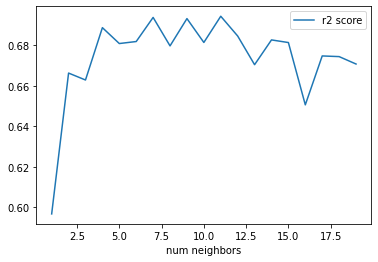

In [ ]:
X = featuresWithCategories.copy()
y = label.copy()

resultsWithCategories = tryDifferentNumNeighbors(20, X, y)
resultsWithCategoriesTestSet = resultsWithCategories[0]
resultsWithCategoriesTrainingSet = pd.DataFrame(resultsWithCategories[1], columns = ['num neighbors', 'r2 score'])
resultsWithCategoriesTrainingSet.plot.line(x='num neighbors', y='r2 score')

In [ ]:
featuresNoCategories.head()

,rating_votes,review_number,author_mean_rating
0,0.032275,0.104320,0.742667
1,0.020913,0.060296,0.742667
2,0.054605,0.172267,0.537333
3,0.124726,0.239376,0.552500
4,0.017584,0.054357,0.742667


Cross validation results with 5 folds: [0.63218024 0.54723925 0.58327411 0.5131022  0.55589939]
Cross validation results with 5 folds: [0.65973081 0.66986133 0.66573401 0.66647471 0.63453616]
Cross validation results with 5 folds: [0.68882248 0.70644572 0.6543194  0.67033358 0.68369322]
Cross validation results with 5 folds: [0.70511875 0.70992291 0.68071229 0.71909614 0.70798449]
Cross validation results with 5 folds: [0.70500808 0.70472916 0.68433767 0.70715299 0.68533759]
Cross validation results with 5 folds: [0.69406863 0.70550517 0.70085662 0.72937056 0.7127613 ]
Cross validation results with 5 folds: [0.69421349 0.68482351 0.73206889 0.72488686 0.71602419]
Cross validation results with 5 folds: [0.7225141  0.71696248 0.70060336 0.71106727 0.73424661]
Cross validation results with 5 folds: [0.71584089 0.72742078 0.74673428 0.71219135 0.72379893]
Cross validation results with 5 folds: [0.70739346 0.74082882 0.71731383 0.72840647 0.72686249]
Cross validation results with 5 folds: [

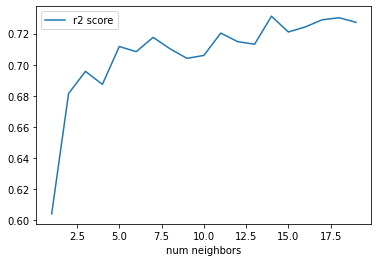

In [ ]:
X = featuresNoCategories.copy()
y = label.copy()

resultsNoCategories = tryDifferentNumNeighbors(20, X, y)
resultsNoCategoriesTestSet = resultsNoCategories[0]
resultsNoCategoriesTrainingSet = pd.DataFrame(resultsNoCategories[1], columns = ['num neighbors', 'r2 score'])
resultsNoCategoriesTrainingSet.plot.line(x='num neighbors', y='r2 score')